## Advect a top-hat function


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create domain

xmin = 0.
xmax = 1.

# Number of points on the grid
Nx = 100

# Number of ghost cells
Ng = 1

# Step size
delta_x = (xmax - xmin)/(Nx - 1)

# Define x-axis
x = np.arange(xmin - Ng*delta_x , xmax + (Ng + 1)*delta_x, delta_x)

print(x.shape)
#print(x)

(102,)


### Initial profile:

In [3]:
def top_hat(x):
    
    if (1/3 <= x <= 2/3):
        return 1
    else:
        return 0

In [4]:
# y axis
y = []

for j in range(len(x)):
    
    y.append(top_hat(x[j]))

y = np.array(y)

print(x.shape, y.shape)

(102,) (102,)


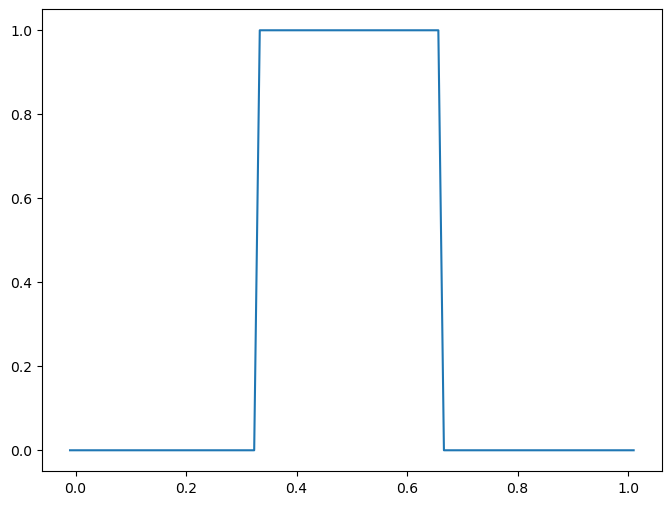

In [5]:
# Plot the initial profile

plt.figure(figsize = (8,6))
plt.plot(x, y)
plt.show()



### Solution array:

In [6]:
# Empty array that will store our slns
u_sln0 = np.zeros((len(x)), dtype=np.float64)
u_sln  = np.zeros((len(x)), dtype=np.float64)

print(u_sln0.shape, u_sln.shape)

# This is the initial vector
#u_sln0 = y

u_sln0[:] = 0.0

u_sln0[np.logical_and(x >= 1./3., x <= 2./3.)] = 1.0

y_0 = u_sln0.copy()

#print(u_sln0)

(102,) (102,)


In [7]:
# Time discretisation
CFL = 0.5 ## <= 1
c = 1.0

# Time step
delta_t = CFL*delta_x/c

# Time -> 1 period so that the profile stays on spot
t_period = (xmax - xmin)/c

# Initialise time at t=0
t = 0.

#print(Ng-1, Nx+Ng-2)
#print(Ng+1, Nx+Ng)

# While statement
while t < 1.0*t_period:
    
    u_sln0[Ng-1]  = u_sln0[Nx+Ng-2]
    u_sln0[Nx+Ng] = u_sln0[Ng+1]
    
    for i in range(1, 101):
        u_sln[i] = u_sln0[i] - CFL*(u_sln0[i] - u_sln0[i-1])
        
    u_sln0[:] = u_sln[:]
    t += delta_t

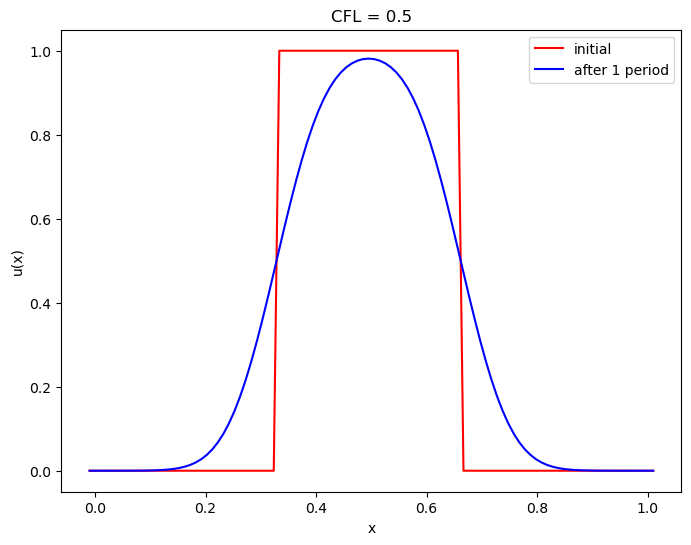

In [8]:
    
# Plot the initial profile

plt.figure(figsize = (8,6))
plt.title(f"CFL = {CFL}")
plt.plot(x, y_0, color = "red", label ="initial")
plt.plot(x, u_sln, color = "blue", label="after 1 period")

plt.xlabel(r"x")
plt.ylabel(r"u(x)")
plt.legend()
plt.show()